## Homework 6: Implement 10-fold cross-validation one time and 100 times

In [18]:
from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
    
        k_neighbor_labels = [self.y_train[i] for i in k_idx]

        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [20]:
import sys
import numpy as np
import numpy.matlib as nm
np.set_printoptions(threshold=sys.maxsize)

N1 = 100; N2 = 20; # Class sizes
x_up = np.random.randn(N1,2)
x_low = np.random.randn(N2,2)+2
x = np.vstack((x_up, x_low))

t_up = np.matlib.repmat(0,N1,1)
t_low = np.matlib.repmat(1,N2,1)
t = np.vstack((t_up, t_low)).squeeze(1)
tv=np.unique(t) # tv=[0,1]


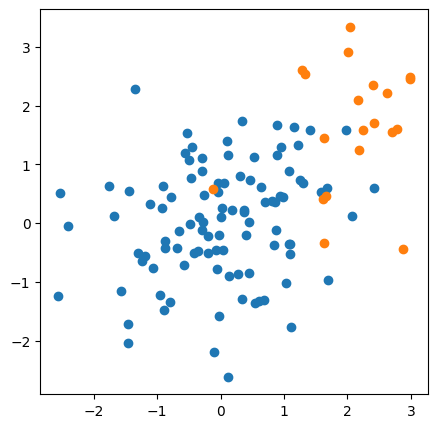

In [21]:

import matplotlib.pyplot as plt
index=np.where(t==0)
point = x[index,:]
fig, ax = plt.subplots(figsize=(5, 5))
for k in tv:
    index=np.where(t==k)
    point = x[index,:].T
    ax.scatter(*point)

plt.show()

In [22]:
# 1. Repeat the 10-fold CV 100 times and average the curves of validation accuracy versus K to 
# determine the optimal K

In [23]:
# Implement your code here
Nfold = 10
Kvals= list(range(1, 30, 2))
Nrep = 100
Errors = np.zeros((len(Kvals), Nfold, Nrep))
N = np.size(x,0)

In [24]:
for rep in range(Nrep):
    order = nm.random.permutation(N)
    sizes = nm.repmat(nm.floor(N/Nfold), 1, Nfold)
    sizes[-1] = sizes[-1]+N-np.sum(sizes)
    csizes =[0]
    csizes = np.append(csizes, nm.cumsum(sizes))
    for kv in range(len(Kvals)):
        K = Kvals[kv]
        for fold in range(Nfold):
            trainX = x
            traint = t
            index1 = int(csizes[fold])
            index2 = int(csizes[fold+1])
            foldindex = order[index1:index2]
            trainX = np.delete(trainX, foldindex, axis =0)
            traint = np.delete(traint, foldindex, axis=0)
            testX = x[foldindex]
            testt = t[foldindex]
            clf = KNN(k=K)
            clf.fit(trainX, traint)
            ans = clf.predict(testX)
            Errors[kv][fold][rep] = np.sum(ans!=testt)

In [25]:
s = np.sum(np.sum(Errors,2),1)
s/=Nfold*Nrep*12


Text(0, 0.5, 'Validation accuracy')

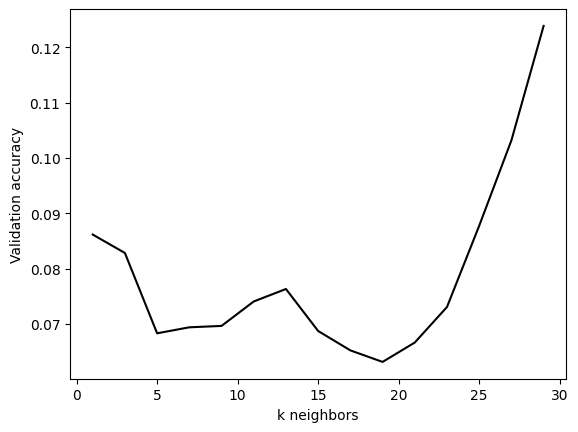

In [26]:
import pylab as plt
%matplotlib inline
plt.plot(Kvals,s,'k',label="Training loss")
plt.xlabel('k neighbors')
plt.ylabel('Validation accuracy')

In [27]:
# 2. Perform the 10-fold CV one time and average the curve of validation accuracy versus K

In [28]:
# Implement your code here
Nfold = 10
Errors1= np.zeros((len(Kvals), Nfold))

In [29]:
order = nm.random.permutation(N)
sizes = nm.repmat(nm.floor(N/Nfold), 1, Nfold)
sizes[-1] = sizes[-1]+N-np.sum(sizes)
csizes =[0]
csizes = np.append(csizes, nm.cumsum(sizes))
for kv in range(len(Kvals)):
    K = Kvals[kv]
    for fold in range(Nfold):
        trainX = x
        traint = t
        index1 = int(csizes[fold])
        index2 = int(csizes[fold+1])
        foldindex = order[index1:index2]
        trainX = np.delete(trainX, foldindex, axis =0)
        traint = np.delete(traint, foldindex, axis=0)
        testX = x[foldindex]
        testt = t[foldindex]
        clf = KNN(k=K)
        clf.fit(trainX, traint)
        ans = clf.predict(testX)
        Errors1[kv][fold] = np.sum(ans!=testt)


In [30]:
s = np.sum(Errors1,1)

s/=10*12

Text(0, 0.5, 'Validation accuracy')

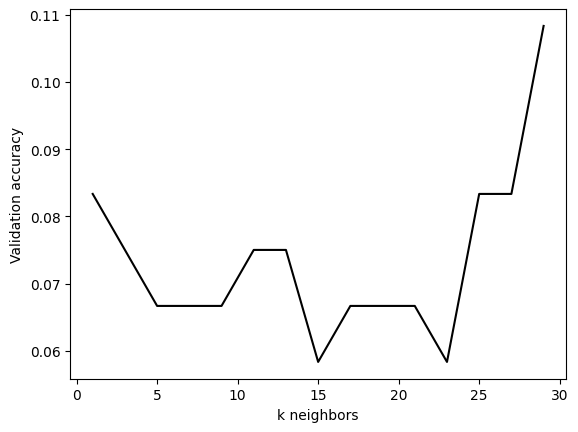

In [31]:
import pylab as plt
%matplotlib inline
plt.plot(Kvals,s,'k',label="Training loss")

plt.xlabel('k neighbors')
plt.ylabel('Validation accuracy')